In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
netflix_dataset = pd.read_csv("IMDb movies.csv")
netflix_dataset.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,26-12-1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,19-08-1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,13-11-1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,06-03-1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [3]:
netflix_dataset.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [4]:
drop_col = ['votes','budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics']

In [5]:
netflix_dataset = netflix_dataset.drop(columns = drop_col)

In [6]:
netflix_dataset.rename(columns={'avg_vote': 'user_rating'}, inplace=True)

In [7]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdb_title_id       85855 non-null  object 
 1   title               85855 non-null  object 
 2   original_title      85855 non-null  object 
 3   year                85855 non-null  object 
 4   date_published      85855 non-null  object 
 5   genre               85855 non-null  object 
 6   duration            85855 non-null  int64  
 7   country             85791 non-null  object 
 8   language            84954 non-null  object 
 9   director            85768 non-null  object 
 10  writer              84283 non-null  object 
 11  production_company  81400 non-null  object 
 12  actors              85786 non-null  object 
 13  description         83740 non-null  object 
 14  user_rating         85855 non-null  float64
dtypes: float64(1), int64(1), object(13)
memory usage: 9.8

In [8]:
 netflix_dataset.isnull().sum()

imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                 64
language               901
director                87
writer                1572
production_company    4455
actors                  69
description           2115
user_rating              0
dtype: int64

### Here we have no issue as the main columns that we need dont have null values ( user_rating , genre, title )

# Vizualisation

## Top content creating countries

In [9]:
country_count= netflix_dataset['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame({'Country': country_count.index, 'Shows': country_count.values})
topcountries=country_count[0:11]
topcountries

,Country,Shows
0,USA,28511
1,India,6065
2,UK,4111
3,Japan,3077
4,France,3055
5,Italy,2444
6,Canada,1802
7,Germany,1396
8,Turkey,1351
9,Hong Kong,1239


## Year wise analysis

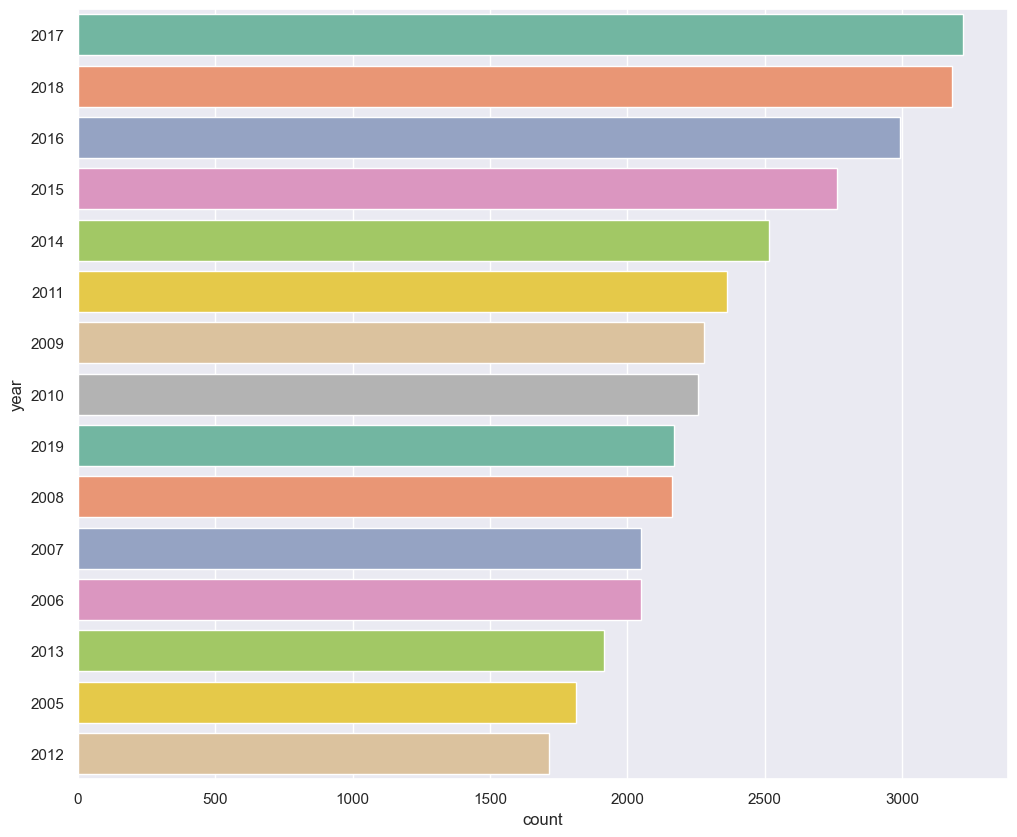

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year", data= netflix_dataset, palette="Set2", order=netflix_dataset['year'].value_counts().index[0:15])

## Analysis of duration of movies

In [11]:
# understand that the data is in min 
netflix_dataset['duration']

0         45
1         70
2         53
3        100
4         68
        ... 
85850     95
85851    103
85852    130
85853     98
85854     74
Name: duration, Length: 85855, dtype: int64

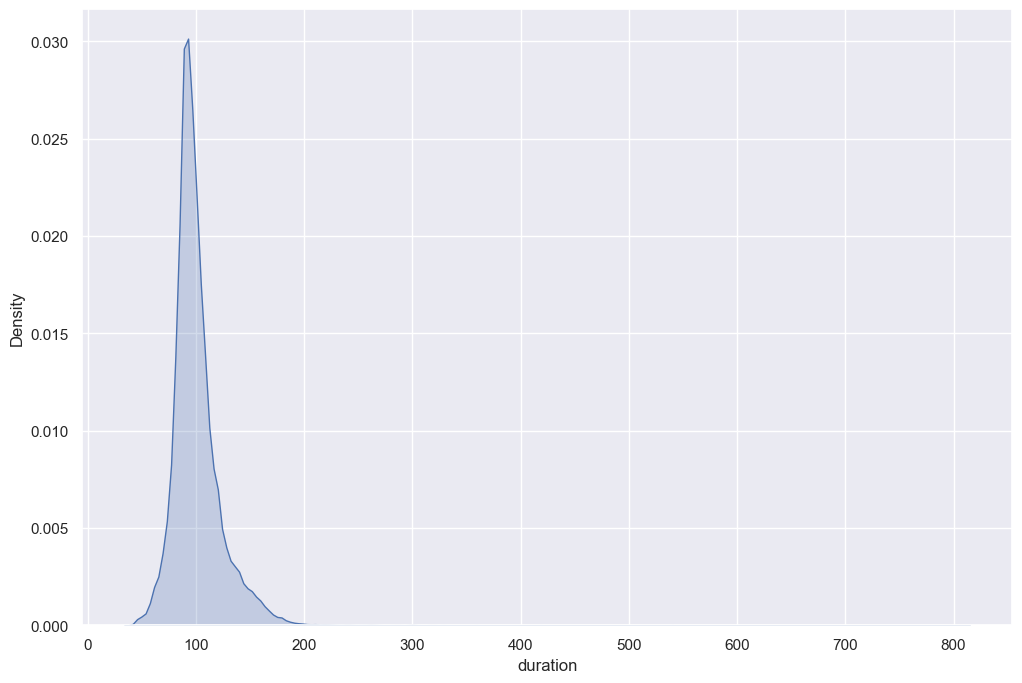

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
ax=sns.kdeplot(data=netflix_dataset['duration'], shade=True)

## Find out the list of most popular and liked genre


In [13]:
def find_top_popular_genres(netflix_dataset, n=3):
    genre_counts = {}
    for genres in netflix_dataset['genre']:
        for genre in genres.split(', '):
            genre_counts[genre] = genre_counts.get(genre, 0) + 1
    top_genres = sorted(genre_counts, key=genre_counts.get, reverse=True)[:n]
    return top_genres



In [14]:
popular_genre = find_top_popular_genres(netflix_dataset,n=3)
print("The 3 popular genre are:", popular_genre)

The 3 popular genre are: ['Drama', 'Comedy', 'Romance']


In [15]:
df = netflix_dataset
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,user_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,26-12-1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,19-08-1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8
3,tt0002101,Cleopatra,Cleopatra,1912,13-11-1912,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2
4,tt0002130,L'Inferno,L'Inferno,1911,06-03-1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,29-01-2020,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,13-02-2020,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,08-03-2019,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,15-03-2019,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4


## Recommandation Engine Model

In [16]:
df['genre'] = df['genre'].apply(lambda x: ', '.join([f'({genre})' for genre in x.split(', ')]))
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,user_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,(Romance),45,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,26-12-1906,"(Biography), (Crime), (Drama)",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,19-08-1911,(Drama),53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8
3,tt0002101,Cleopatra,Cleopatra,1912,13-11-1912,"(Drama), (History)",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2
4,tt0002130,L'Inferno,L'Inferno,1911,06-03-1911,"(Adventure), (Drama), (Fantasy)",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,29-01-2020,(Comedy),95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,13-02-2020,"(Comedy), (Drama)",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,08-03-2019,(Drama),130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,15-03-2019,"(Drama), (Family)",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4


# dataset is to big so we need to reduce the sample size 

In [17]:
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

In [18]:
sample_size = 1000
df1 = df.sample(n=sample_size, random_state=0)
df1.reset_index(drop=True, inplace=True)
df1

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,user_rating
0,tt1808208,Jak sie pozbyc cellulitu,Jak sie pozbyc cellulitu,2011,04-02-2011,(Comedy),106,Poland,Polish,Andrzej Saramonowicz,"Andrzej Saramonowicz, Ewa Sienkiewicz",San Graal,"Magdalena Boczarska, Dominika Kluzniak, Maja H...",NaN,4.1
1,tt0157044,Sitcom - La famiglia è simpatica,Sitcom,1998,05-03-1999,"(Comedy), (Drama), (Romance)",85,France,French,François Ozon,François Ozon,Fidélité Productions,"Évelyne Dandry, François Marthouret, Marina de...",The adventures of an upper-class suburban fami...,6.7
2,tt3882000,Microbo & Gasolina,Microbe et Gasoil,2015,05-05-2016,"(Adventure), (Comedy), (Drama)",105,France,"French, Japanese",Michel Gondry,Michel Gondry,Partizan,"Ange Dargent, Théophile Baquet, Diane Besnier,...",Two young friends embark on a road trip across...,6.7
3,tt0097898,Mob War,Mob War,1989,11-10-1989,"(Action), (Crime), (Drama)",96,USA,English,J. Christian Ingvordsen,"J. Christian Ingvordsen, John Weiner",Cinema Sciences,"Jake LaMotta, Johnny Stumper, David Henry Kell...",When the New York City police disrupt a big co...,2.8
4,tt0026805,La lampada cinese,Oil for the Lamps of China,1935,08-06-1935,(Drama),97,USA,English,Mervyn LeRoy,"Alice Tisdale Hobart, Laird Doyle",Warner Bros.,"Pat O'Brien, Josephine Hutchinson, Jean Muir, ...","An American, working for his oil company in Ch...",6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,tt0048789,Uomini violenti,The Violent Men,1955,01-09-1955,(Western),96,USA,English,Rudolph Maté,"Harry Kleiner, Donald Hamilton",Columbia Pictures,"Glenn Ford, Barbara Stanwyck, Edward G. Robins...",A bitter land dispute causes a Civil War veter...,7.0
996,tt0057656,Nel bene e nel male,Françoise ou La vie conjugale,1964,1964,(Drama),112,"France, Italy, West Germany",French,André Cayatte,"Maurice Aubergé, André Cayatte",Films Borderie,"Marie-José Nat, Jacques Charrier, Michel Subor...",The story of the couple from the very first me...,7.0
997,tt10555482,"Isa pa, with feelings","Isa pa, with feelings",2019,27-10-2019,"(Comedy), (Romance)",102,Philippines,"Tagalog, Filipino, Sign Languages",Prime Cruz,"Jenilee Chuaunsu, Kookai Labayen",ABS-CBN Film Productions,"Maine Mendoza, Carlo Aquino, Lotlot De Leon, C...",It is a Filipino romantic-comedy film directed...,7.8
998,tt1723112,Jiabiangou,Jiabiangou,2010,14-03-2012,(Drama),112,"Hong Kong, France, Belgium",Mandarin,Bing Wang,"Bing Wang, Xianhui Yang",Wil Productions,"Ye Lu, Renjun Lian, Cenzi Xu, Haoyu Yang, Zhen...",It recounts the harrowing story of life at one...,7.0


In [20]:
# Preprocess the 'genre' column using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df1['genre'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [21]:
def recommend_movie(genre, cosine_sim=cosine_sim, df=df1):
    # Find the index of the movie based on the genre
    movie_index = df1[df1['genre'] == genre].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[movie_index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top recommended movie
    top_movie_index = sim_scores[1][0]  # Considering the second most similar movie
    recommended_movie = df.iloc[top_movie_index]

    return recommended_movie



In [22]:
genres = df1['genre'].unique()
for genre in genres:
    print("Genre:", genre)
    recommended_movie = recommend_movie(genre)
    print("Recommended Movie:", recommended_movie['title'])
    print()

Genre: (Comedy)
Recommended Movie: Ali Kundilli

Genre: (Comedy), (Drama), (Romance)
Recommended Movie: Meendum Kokila

Genre: (Adventure), (Comedy), (Drama)
Recommended Movie: Il treno per il Darjeeling

Genre: (Action), (Crime), (Drama)
Recommended Movie: Ticket Out

Genre: (Drama)
Recommended Movie: Altiplano

Genre: (Drama), (Romance)
Recommended Movie: Honeyglue

Genre: (Family), (Sci-Fi)
Recommended Movie: Mail Order Monster

Genre: (Crime), (Drama)
Recommended Movie: 9 Naga

Genre: (Comedy), (Crime)
Recommended Movie: Sporlaust

Genre: (Drama), (Musical), (Romance)
Recommended Movie: The Hard Way

Genre: (Comedy), (Drama)
Recommended Movie: Mi Mejor Enemigo

Genre: (Comedy), (Romance)
Recommended Movie: 20 anni di meno

Genre: (Action), (Adventure), (Sci-Fi)
Recommended Movie: Jurassic Park III

Genre: (Adventure), (Biography), (Drama)
Recommended Movie: Sognando l'Africa

Genre: (Biography), (Crime), (Drama)
Recommended Movie: Stuck

Genre: (Comedy), (Crime), (Music)
Recommende

## Find what Genre Movies have received the best and worst ratings based on User Rating.

In [23]:
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,user_rating
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,(Romance),45,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,26-12-1906,"(Biography), (Crime), (Drama)",70,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,19-08-1911,(Drama),53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8
3,tt0002101,Cleopatra,Cleopatra,1912,13-11-1912,"(Drama), (History)",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2
4,tt0002130,L'Inferno,L'Inferno,1911,06-03-1911,"(Adventure), (Drama), (Fantasy)",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,29-01-2020,(Comedy),95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,13-02-2020,"(Comedy), (Drama)",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,08-03-2019,(Drama),130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,15-03-2019,"(Drama), (Family)",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4


In [24]:
genre_user_rating = df[['genre', 'user_rating']]
# Split the genres into a list
genre_user_rating['genre'] = genre_user_rating['genre'].str.split(',')
# Explode the genre list so that each row has only one genre
genre_user_rating = genre_user_rating.explode('genre')
# Group by genre and calculate the average user rating
average_rating_by_genre = genre_user_rating.groupby('genre')['user_rating'].mean().reset_index()
sorted_genres = average_rating_by_genre.sort_values(by='user_rating', ascending=False)


In [26]:
print("Genres with the best ratings:")
print(sorted_genres.head())

Genres with the best ratings:
            genre  user_rating
30  (Documentary)     7.300000
9     (Film-Noir)     6.645899
27    (Biography)     6.638413
34    (Film-Noir)     6.603448
10      (History)     6.564982


In [27]:
print("\nGenres with the worst ratings:")
print(sorted_genres.tail())


Genres with the worst ratings:
            genre  user_rating
11       (Horror)     5.093272
36       (Horror)     4.607432
41       (Sci-Fi)     4.554436
24        (Adult)     4.550000
16   (Reality-TV)     3.800000
